#TODO: tabela com esses atributos nome, definição e codigo
7. Attribute Information: (classes: edible=e, poisonous=p)
     1. cap-shape:                bell=b,conical=c,convex=x,flat=f,                                  knobbed=k,sunken=s
     2. cap-surface:              fibrous=f,grooves=g,scaly=y,smooth=s
     3. cap-color:                brown=n,buff=b,cinnamon=c,gray=g,reen=r,                                  pink=p,purple=u,red=e,white=w,yellow=y
     4. bruises?:                 bruises=t,no=f
     5. odor:                     almond=a, anise=l, creosote=c, fishy=y,foul=f,                                  musty=m, none=n,pungent=p, spicy=s
     6. gill-attachment:          attached=a,descending=d,free=f,notched=n
     7. gill-spacing:             close=c,crowded=w,distant=d
     8. gill-size:                broad=b,narrow=n
     9. gill-color:               black=k,brown=n,buff=b,chocolate=h,gray=g,                                  green=r,orange=o,pink=p,purple=u,red=e,                                  white=w,yellow=y
    10. stalk-shape:              enlarging=e,tapering=t
    11. stalk-root:               bulbous=b,club=c,cup=u,equal=e,                                  rhizomorphs=z,rooted=r,missing=?
    12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
    13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
    14. stalk-color-above-ring:   brown=n,buff=b,cinnamon=c,gray=g,orange=o,                                  pink=p,red=e,white=w,yellow=y
    15. stalk-color-below-ring:   brown=n,buff=b,cinnamon=c,gray=g,orange=o,                                  pink=p,red=e,white=w,yellow=y
    16. veil-type:                partial=p,universal=u
    17. veil-color:               brown=n,orange=o,white=w,yellow=y
    18. ring-number:              none=n,one=o,two=t
    19. ring-type:                cobwebby=c,evanescent=e,flaring=f,large=l,                                  none=n,pendant=p,sheathing=s,zone=z
    20. spore-print-color:        black=k,brown=n,buff=b,chocolate=h,green=r,                                  orange=o,purple=u,white=w,yellow=y
    21. population:               abundant=a,clustered=c,numerous=n,                                  scattered=s,several=v,solitary=y
    22. habitat:                  grasses=g,leaves=l,meadows=m,paths=p,                                  urban=u,waste=w,woods=d

In [ ]:
pip install dython


In [ ]:
pip install researchpy

In [89]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import researchpy as rp
import matplotlib.pyplot as plt
import copy
import math
from collections import Counter
import scipy.stats as ss
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
sns.set_theme(style="whitegrid")


In [104]:
atributos_colunas =['target','cap-shape','cap-surface','cap-color','bruises','odor','gill-attachment','gill-spacing','gill-size','gill-color','stalk-shape','stalk-root','stalk-surface-above-ring','stalk-surface-below-ring','stalk-color-above-ring','stalk-color-below-ring','veil-type','veil-color','ring-number','ring-type','spore-print-color','population','habitat']
missing_value= '?' 
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data", header=None, names= atributos_colunas, index_col=False, na_values = missing_value)

nlin, ncol= df.shape

df.head()


,target,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


# Análise Exploratória de Dados




A seguir é possível ver algumas informações sobre o dataset

In [105]:
#--------------------------------------------------------------------------------------------------------------
# INFORMAÇÃO GERAL DO DATASET
#--------------------------------------------------------------------------------------------------------------
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   target                    8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                5644 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [106]:
#--------------------------------------------------------------------------------------------------------------
# FREQUÊNCIA
#--------------------------------------------------------------------------------------------------------------
rp.summary_cat(df) 

,Variable,Outcome,Count,Percent
0,target,e,4208,51.80
1,,p,3916,48.20
2,cap-shape,x,3656,45.00
3,,f,3152,38.80
4,,k,828,10.19
...,...,...,...,...
113,,p,1144,14.08
114,,l,832,10.24
115,,u,368,4.53
116,,m,292,3.59


In [107]:
#--------------------------------------------------------------------------------------------------------------
# VALORES FALTANTES
#--------------------------------------------------------------------------------------------------------------
ds_cat_stats = pd.DataFrame(columns = ['column','num_miss', 'pct_miss'])
tmp = pd.DataFrame()

for c in df.columns:
    tmp['column'] = [c]
    tmp['values'] = [df[c].unique()]
    #tmp['values_count_incna'] = len(list(df[c].unique()))
    #tmp['values_count_nona'] = int(df[c].nunique())
    tmp['num_miss'] = df[c].isnull().sum()
    tmp['pct_miss'] = (df[c].isnull().sum()/ len(df)).round(3)*100
    ds_cat_stats = ds_cat_stats.append(tmp)
    
ds_cat_stats



,column,num_miss,pct_miss,values
0,target,0,0.0,"[p, e]"
0,cap-shape,0,0.0,"[x, b, s, f, k, c]"
0,cap-surface,0,0.0,"[s, y, f, g]"
0,cap-color,0,0.0,"[n, y, w, g, e, p, b, u, c, r]"
0,bruises,0,0.0,"[t, f]"
0,odor,0,0.0,"[p, a, l, n, f, c, y, s, m]"
0,gill-attachment,0,0.0,"[f, a]"
0,gill-spacing,0,0.0,"[c, w]"
0,gill-size,0,0.0,"[n, b]"
0,gill-color,0,0.0,"[k, n, g, p, w, h, u, e, b, r, y, o]"


In [102]:
#--------------------------------------------------------------------------------------------------------------
# OBSERVACÕES DUPLICADAS
#--------------------------------------------------------------------------------------------------------------
df.duplicated().value_counts()

False    8124
dtype: int64

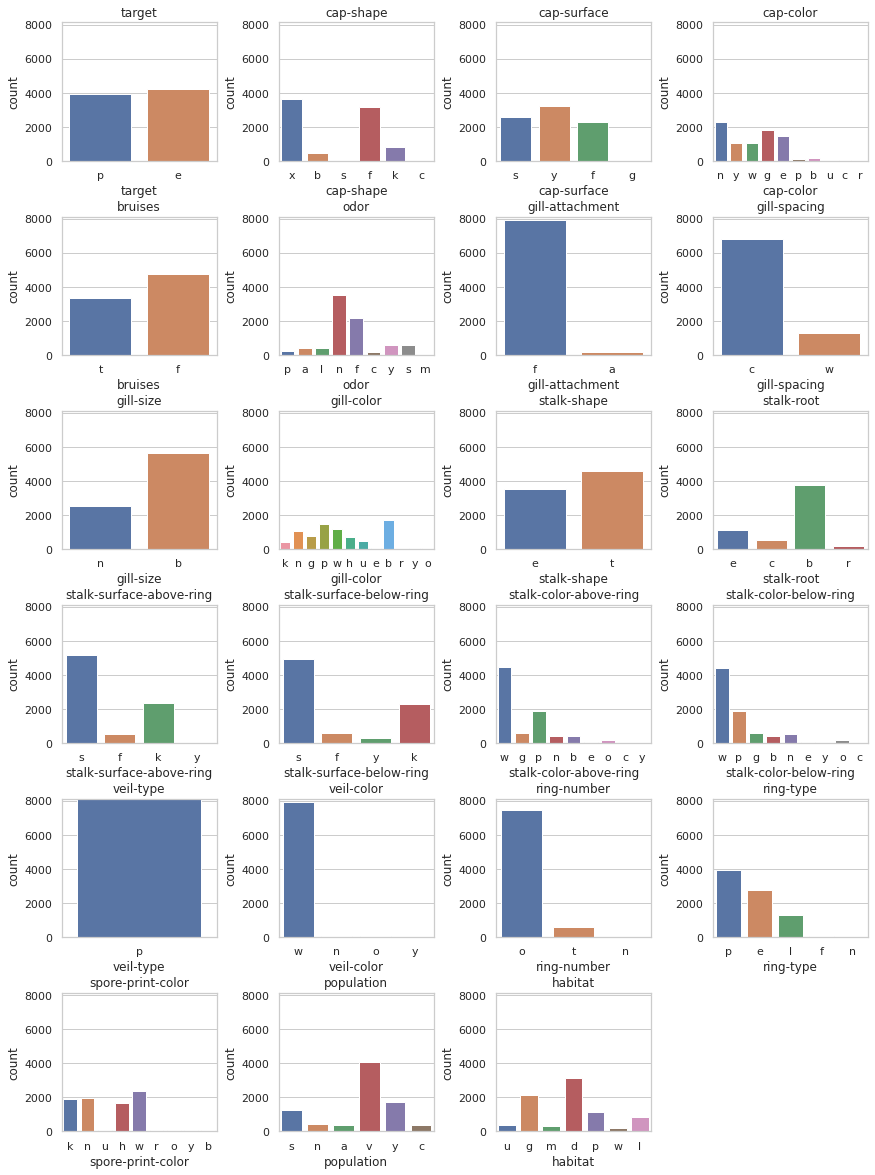

In [108]:
#--------------------------------------------------------------------------------------------------------------
# PLOT FREQUÊNCIA
#--------------------------------------------------------------------------------------------------------------

a = 6 
b = 4 
c = 1 

fig = plt.figure(figsize=(14,14))
for i in atributos_colunas:
    ax= plt.subplot(a, b, c)
    plt.title('{}'.format(i))
    plt.xlabel(i)
    ax.set_ylim(0,len(df))
    sns.countplot(df[i])
    c = c + 1

plt.subplots_adjust(left=0.1,bottom=0.9, right=0.9,top=2, wspace=0.4, hspace=0.4)
plt.show()

In [ ]:
# association

def conditional_entropy(x,y):
    # entropy of x given y
    y_counter = Counter(y)
    xy_counter = Counter(list(zip(x,y)))
    total_occurrences = sum(y_counter.values())
    entropy = 0
    for xy in xy_counter.keys():
        p_xy = xy_counter[xy] / total_occurrences
        p_y = y_counter[xy[1]] / total_occurrences
        entropy += p_xy * math.log(p_y/p_xy)
    return entropy

def theil_u(x,y):
    s_xy = conditional_entropy(x,y)
    x_counter = Counter(x)
    total_occurrences = sum(x_counter.values())
    p_x = list(map(lambda n: n/total_occurrences, x_counter.values()))
    s_x = ss.entropy(p_x)
    if s_x == 0:
        return 1
    else:
        return (s_x - s_xy) / s_x

theilu = pd.DataFrame(index=['target'],columns=df.columns)
columns = df.columns
for j in range(0,len(columns)):
    u = theil_u(df['target'].tolist(),df[columns[j]].tolist())
    theilu.loc[:,columns[j]] = u

theilu.fillna(value=np.nan,inplace=True)
plt.figure(figsize=(20,1))
sns.heatmap(theilu,annot=True,fmt='.2f')
plt.show()

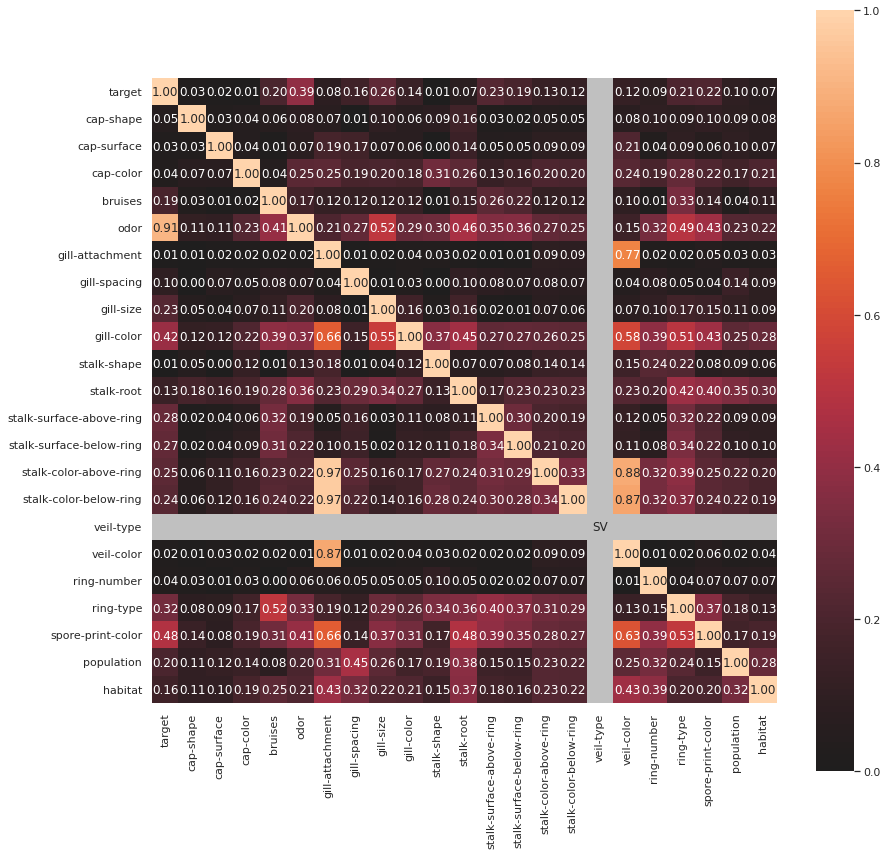

{'ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f55bc9a0cd0>,
 'corr':                             target  cap-shape  ...  population   habitat
 target                    1.000000   0.029522  ...    0.100808  0.068946
 cap-shape                 0.048842   1.000000  ...    0.090186  0.076914
 cap-surface               0.028617   0.030204  ...    0.097547  0.070899
 cap-color                 0.036083   0.067283  ...    0.171243  0.206435
 bruises                   0.192559   0.033847  ...    0.038606  0.108533
 odor                      0.906920   0.112945  ...    0.228852  0.219026
 gill-attachment           0.014178   0.007299  ...    0.026963  0.032364
 gill-spacing              0.100977   0.002815  ...    0.144702  0.090146
 gill-size                 0.230369   0.053098  ...    0.114321  0.088057
 gill-color                0.417367   0.116157  ...    0.254277  0.282748
 stalk-shape               0.007524   0.050885  ...    0.093624  0.063570
 stalk-root                0.134943   

In [109]:
#--------------------------------------------------------------------------------------------------------------
# MATRIX DE ASSOCIAÇÃO
#--------------------------------------------------------------------------------------------------------------

from dython.nominal import associations
associations(df,nom_nom_assoc='theil', figsize= (14,14))


target     e     p
odor              
a        400     0
c          0   192
f          0  2160
l        400     0
m          0    36
n       3408   120
p          0   256
s          0   576
y          0   576


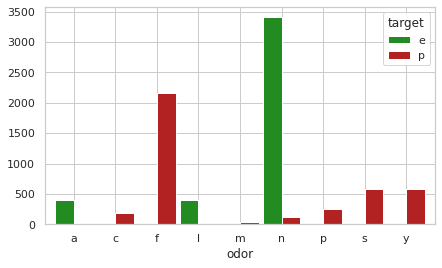

In [110]:
#--------------------------------------------------------------------------------------------------------------
# VARIÁVEL ODOR
#--------------------------------------------------------------------------------------------------------------
CrosstabResult=pd.crosstab(index=df['odor'],columns=df['target'])
print(CrosstabResult)
CrosstabResult.plot.bar(figsize=(7,4),rot=0, color=['forestgreen', 'firebrick'], width=0.9)



target                e     p
spore-print-color            
b                    48     0
h                    48  1584
k                  1648   224
n                  1744   224
o                    48     0
r                     0    72
u                    48     0
w                   576  1812
y                    48     0


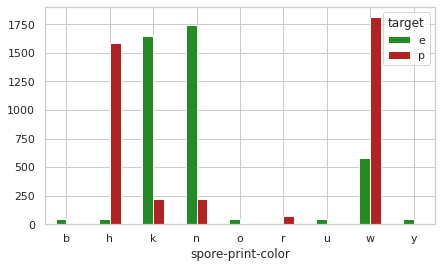

In [111]:
#--------------------------------------------------------------------------------------------------------------
# VARIÁVEL SPORE-PRINT-COLOR
#--------------------------------------------------------------------------------------------------------------
CrosstabResult=pd.crosstab(index=df['spore-print-color'],columns=df['target'])
print(CrosstabResult)
CrosstabResult.plot.bar(figsize=(7,4), rot=0, color=['forestgreen', 'firebrick'])

target        e     p
gill-color           
b             0  1728
e            96     0
g           248   504
h           204   528
k           344    64
n           936   112
o            64     0
p           852   640
r             0    24
u           444    48
w           956   246
y            64    22


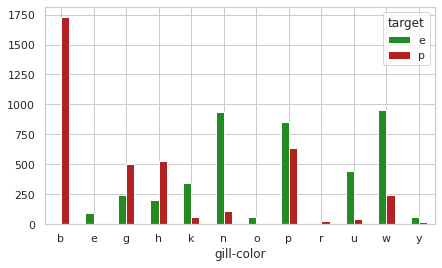

In [112]:
#--------------------------------------------------------------------------------------------------------------
# VARIÁVEL GILL-COLLOR
#--------------------------------------------------------------------------------------------------------------
CrosstabResult=pd.crosstab(index=df['gill-color'],columns=df['target'])
print(CrosstabResult)
CrosstabResult.plot.bar(figsize=(7,4), rot=0, color=['forestgreen', 'firebrick'])

# Pre processamento


In [63]:
#--------------------------------------------------------------------------------------------------------------
# DROPAR VEIL TYPE
#--------------------------------------------------------------------------------------------------------------
df = df.drop('veil-type', 1)
df.info()

KeyError: ignored

In [70]:
#--------------------------------------------------------------------------------------------------------------
# ONE-HOT Enconding
#--------------------------------------------------------------------------------------------------------------
df_onehot = df.copy()
df_onehot = pd.get_dummies(df_onehot)

print(df_onehot.head())



   target_e  target_p  cap-shape_b  ...  habitat_p  habitat_u  habitat_w
0         0         1            0  ...          0          1          0
1         1         0            0  ...          0          0          0
2         1         0            1  ...          0          0          0
3         0         1            0  ...          0          1          0
4         1         0            0  ...          0          0          0

[5 rows x 117 columns]


# Aprendizado

In [71]:
#--------------------------------------------------------------------------------------------------------------
# DIVIDIR O DATASET
#--------------------------------------------------------------------------------------------------------------
X = df.drop(['target'], axis=1)
y = df['target']

X = pd.get_dummies(X)
y = pd.get_dummies(y)
X.info()
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Columns: 115 entries, cap-shape_b to habitat_w
dtypes: uint8(115)
memory usage: 912.5 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   e       8124 non-null   uint8
 1   p       8124 non-null   uint8
dtypes: uint8(2)
memory usage: 16.0 KB


In [113]:
#--------------------------------------------------------------------------------------------------------------
# DIVIDIR O DATASET EM TREINO E TESTE
#--------------------------------------------------------------------------------------------------------------

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 


In [114]:
#--------------------------------------------------------------------------------------------------------------
# MODELO 
#--------------------------------------------------------------------------------------------------------------
tree = DecisionTreeClassifier()
tree= tree.fit(X_train, y_train)

y_pred= tree.predict(X_test)

In [115]:
#--------------------------------------------------------------------------------------------------------------
# AVALIAÇÃO
#--------------------------------------------------------------------------------------------------------------
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [87]:
print(classification_report(y_test, y_pred))
#print(confusion_matrix(y_test, y_pred))



              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1678
           1       1.00      1.00      1.00      1572

   micro avg       1.00      1.00      1.00      3250
   macro avg       1.00      1.00      1.00      3250
weighted avg       1.00      1.00      1.00      3250
 samples avg       1.00      1.00      1.00      3250



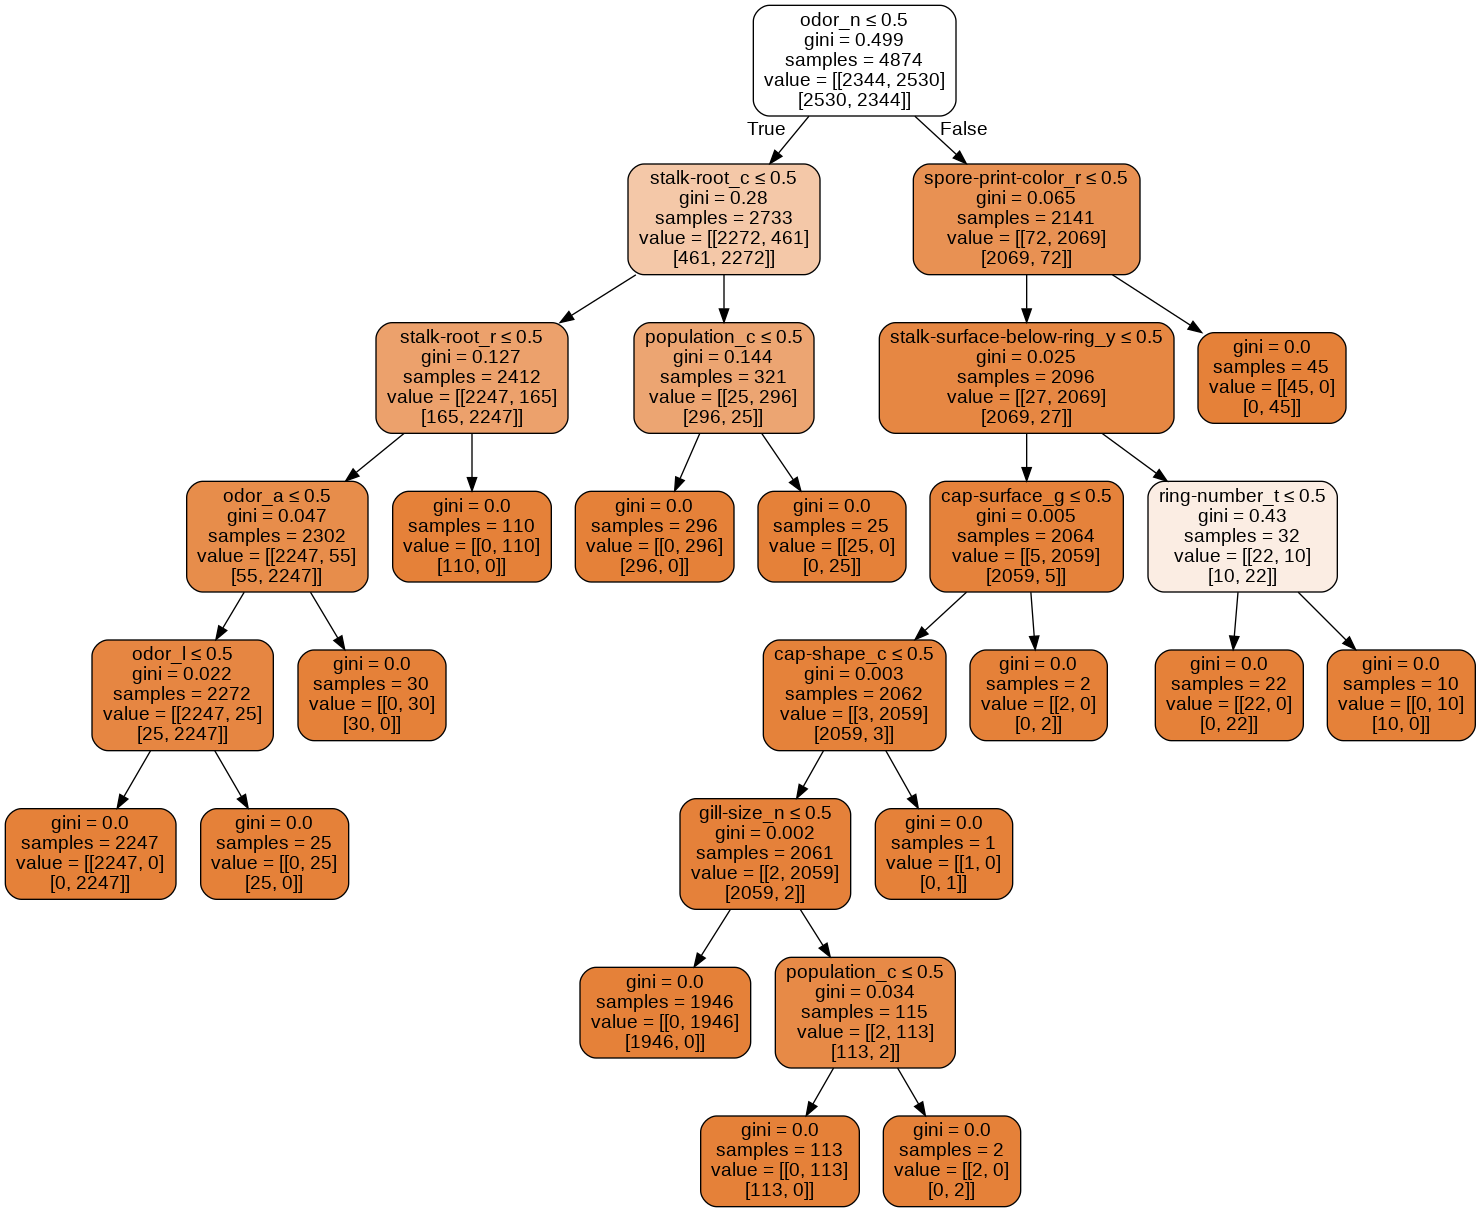

In [101]:
dot_data = StringIO()
export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,feature_names=X_test.columns,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('ex.png')
Image(graph.create_png())